# 作业二：回归模型
- 姓名：韩佳迅
- 学号：2012682
- 专业：计算机科学与技术

### 实验要求

#### 基本要求：
将数据集winequality-white.csv按照4:1划分为训练集和测试集。

1. 构造线性回归模型，并采用批量梯度下降和随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。

2. 对于批量梯度下降和随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：

* 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
* 需要对数据集进行一定的预处理

#### 中级要求：
探究回归模型在机器学习和统计学上的差异。

* 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。

#### 高级要求：
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法均可）。

**截止日期：10月21日**
- 以.ipynb形式的文件提交，输出运行结果，并确保自己的代码能够正确运行
- 发送到邮箱：2120220594@mail.nankai.edu.cn

### 导入需要的包

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

### 导入数据集 winequality-white.csv

In [2]:
# 导入数据
def read_data(path):
    data = np.loadtxt(path, delimiter=",", skiprows=1)
    label = data[:, -1]
    data = data[:, :-1]
    return np.array(data), np.array(label)

### 基本要求

将数据集winequality-white.csv按照4:1划分为训练集和测试集。

1. 构造线性回归模型，并采用批量梯度下降**和**随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。

2. 对于批量梯度下降**和**随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。

特别需要注意：

* 划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。
* 需要对数据集进行一定的预处理

In [3]:
# 归一化
def Normalization_data(data):
    data = (data - np.mean(data, 0)) / (np.max(data, 0) - np.min(data, 0))
    return data

In [4]:
# 数据划分
def split_data(data,label,test_rate):
    train_data = []
    train_label = []
    test_data = []
    test_label = []
    train_index=[] #被划为train的下标 
    test_index=[]  #被划为test的下标
    
    #使用一个字典存放每类label值的下标,{label值：[该值对应的所有下标列表]}
    label_ids = {} 
    for i in range(len(label)):
        label_val = label[i] 
        if label_val not in label_ids.keys():
            label_ids[label_val] = []
        label_ids[label_val].append(i) # 将该类别的下标放到其中
    
    # 在每个类别里分别采样，保证数据分布一致性
    for key,value in label_ids.items():
        sample_num = int(test_rate * len(value)) # 在该类别中的采样数目（test数目）
        sample_list = random.sample(value, sample_num) #该类别中随机选出被划为test的下标集合
        test_index.extend(sample_list)
    train_index = list(set(range(len(label))) - set(test_index)) #剩余的就是被划为train的下标
    
    # shuffle一下，避免输出连续相同的值
    random.shuffle(train_index) 
    random.shuffle(test_index) 
    
    # 根据选出来的index找到对应的数据集
    train_data = [data[i] for i in train_index]
    train_label = [label[i] for i in train_index]
    test_data = [data[i] for i in test_index]
    test_label = [label[i] for i in test_index]
    
    # print("train个数：", len(train_data))
    # print("test个数：", len(test_data))
    
    return np.array(train_data), np.array(train_label), np.array(test_data), np.array(test_label)

In [5]:
# 数据读取+处理
def data_process(path):
    # 读取数据
    data,label=read_data(path)
    #归一化
    data=Normalization_data(data)
    # 回归系数会比特征多一维，为了向量相乘方便，可以在数据左侧添加全为1的一列
    data=np.hstack((np.ones((data.shape[0], 1)), data))
    # 划分训练集和测试集
    train_data, train_label, test_data, test_label = split_data(data,label,0.2)
    return train_data, train_label, test_data, test_label 

In [6]:
# 计算MSE
def MSE(weight, x, y):
    difference =  y - np.dot(x, weight)
    error = np.array([ num*num for num in difference]) 
    mse = error.mean() # MSE
    return mse

In [7]:
# 计算梯度
def batch_gradient(weight, x, y):
    difference =  y - np.dot(x, weight)
    delta = np.dot( np.transpose(difference) , x) /x.shape[0] #梯度
    return delta

In [8]:
#批量梯度下降
def batch_gradient_descent(data, label , learning_rate ,epochs = 3000, epsilon = 1e-7):
    weight = np.random.rand(data.shape[1])
    mses=[ MSE(weight, data, label) ] #存放每轮的mse
    for epoch in range(epochs): #终止条件1：达到一定轮数
        delta = batch_gradient(weight, data, label)
        weight = weight + learning_rate*delta #更新权重
        mse = MSE(weight, data, label)
        mses.append(mse)
        if(abs(mses[-2] - mses[-1]) < epsilon): #终止条件2：收敛
            break
    return mses,weight

In [9]:
# 批量梯度下降的线性回归
def regression_BGD(path, learning_rate):
    train_data, train_label, test_data, test_label = data_process(path)
    mses, weight = batch_gradient_descent(train_data, train_label, learning_rate)
    mse_test = MSE(weight, test_data, test_label)
    mse_train = MSE(weight, train_data, train_label)
    return mse_test, mse_train, mses

In [10]:
# 计算梯度
def Stochastic_gradient(weight, x, y):
    difference =  y - np.dot(x, weight)
    delta = np.dot( np.transpose(difference) , x) #随机梯度，注意这里不用除以m
    return delta

In [11]:
#随机梯度下降
def Stochastic_gradient_descent(data, label , learning_rate ,epochs = 100, epsilon = 1e-7):
    weight = np.random.rand(data.shape[1])
    mses=[ MSE(weight, data, label) ] #存放每轮的mse
    for epoch in range(epochs): #终止条件1：达到一定轮数
#（注意：在随机梯度下降中，一个epoch里把所有数据都算了一遍，
#        但mse的计算是只针对其中的每一个随机数据）
        for i in range(data.shape[0]):
            x=data[i,:]
            y=label[i]
            delta = Stochastic_gradient(weight, x, y) 
            weight = weight + learning_rate*delta #更新权重
            mse = MSE(weight, data, label)
            mses.append(mse)
            if(abs(mses[-2] - mses[-1]) < epsilon): #终止条件2：收敛
                return mses,weight
    return mses,weight

In [12]:
# 随机梯度下降的线性回归
def regression_SGD(path, learning_rate):
    train_data, train_label, test_data, test_label = data_process(path)
    mses, weight = Stochastic_gradient_descent(train_data, train_label, learning_rate)
    mse_test = MSE(weight, test_data, test_label)
    mse_train = MSE(weight, train_data, train_label)
    return mse_test, mse_train, mses

#### 结果展示

* 为了便于观察，设置subplot左侧为整条mse曲线，右侧为前100个epoch的mse曲线。

* 红色为批量梯度下降，蓝色为随机梯度下降。

#### 下面展示不同学习率下的结果：

* 学习率分别为：0.001, 0.02，0.05，0.1，0.2，0.5，0.8

In [15]:
path = "winequality-white.csv"

def show_BGD(learning_rate):
    mse_test_BGD, mse_train_BGD, mses_BGD = regression_BGD(path, learning_rate)
    print('==================批量梯度下降=================')
    print('学习率 :',learning_rate)
    print('test_data mse :', mse_test_BGD)
    print('train_data mse :', mse_train_BGD)

    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    k = [x for x in range(len(mses_BGD))]
    plt.plot(k, mses_BGD, color='red')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.title("All epoches for BGD training")

    plt.subplot(1,2,2)
    k = [x for x in range(1, 101)]
    plt.plot(k, mses_BGD[0:100], color='red')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.title("Top 100 epoches for BGD training")
    return mses_BGD
    
def show_SGD(learning_rate):
    mse_test_SGD, mse_train_SGD, mses_SGD = regression_SGD(path, learning_rate)
    print('==================随机梯度下降=================')
    print('学习率 :',learning_rate)
    print('test_data mse :', mse_test_SGD)
    print('train_data mse :', mse_train_SGD)

    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    k = [x for x in range(len(mses_SGD))]
    plt.plot(k, mses_SGD, color='blue')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.title("All epoches for SGD training")

    plt.subplot(1,2,2)
    k = [x for x in range(1, 101)]
    plt.plot(k, mses_SGD[0:100], color='blue')
    plt.xlabel('epoch')
    plt.ylabel('mse')
    plt.title("Top 100 epoches for SGD training")
    return mses_SGD

==================批量梯度下降=================
学习率 : 0.001
test_data mse : 0.8165276630627469
train_data mse : 0.8307042268914038
==================随机梯度下降=================
学习率 : 0.001
test_data mse : 0.7702513758977876
train_data mse : 0.7899428803892177


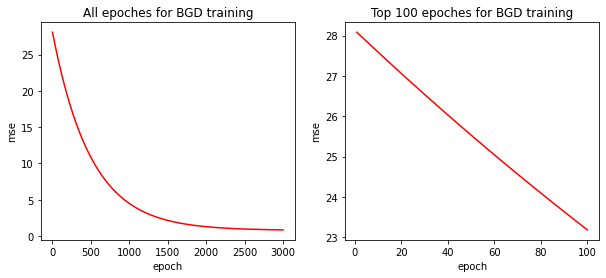

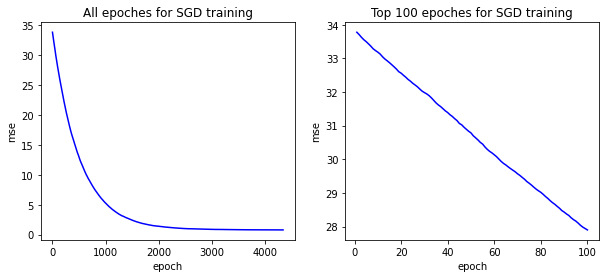

In [16]:
mses_BGD_1 = show_BGD(0.001)
mses_SGD_1 = show_SGD(0.001)

==================批量梯度下降=================
学习率 : 0.02
test_data mse : 0.6084831003652651
train_data mse : 0.6152017971014198
==================随机梯度下降=================
学习率 : 0.02
test_data mse : 0.5668421694176191
train_data mse : 0.578774964470085


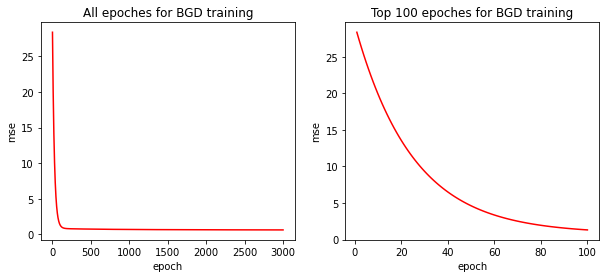

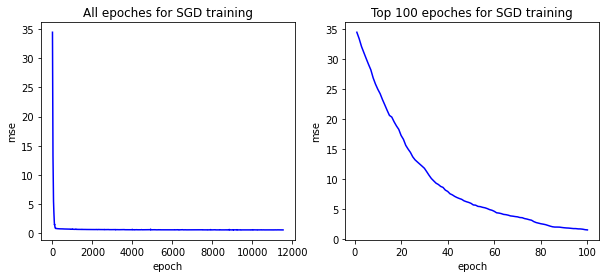

In [17]:
mses_BGD_2=show_BGD(0.02)
mses_SGD_2=show_SGD(0.02)

==================批量梯度下降=================
学习率 : 0.05
test_data mse : 0.5884131156993354
train_data mse : 0.5763261676596082
==================随机梯度下降=================
学习率 : 0.05
test_data mse : 0.5855279660310849
train_data mse : 0.5994506646996097


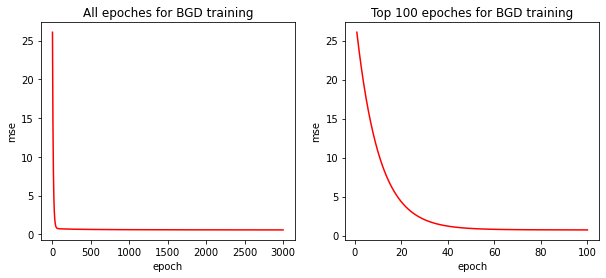

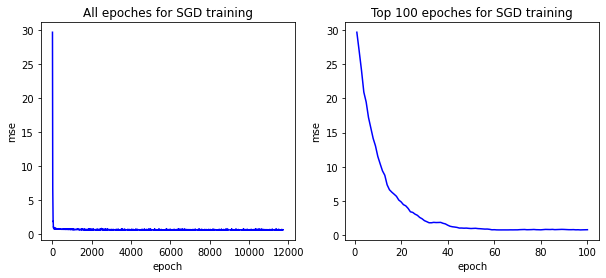

In [18]:
mses_BGD_3=show_BGD(0.05)
mses_SGD_3=show_SGD(0.05)

==================批量梯度下降=================
学习率 : 0.1
test_data mse : 0.5762138971495521
train_data mse : 0.5730587352709033
==================随机梯度下降=================
学习率 : 0.1
test_data mse : 0.5831490520095715
train_data mse : 0.5773943888172932


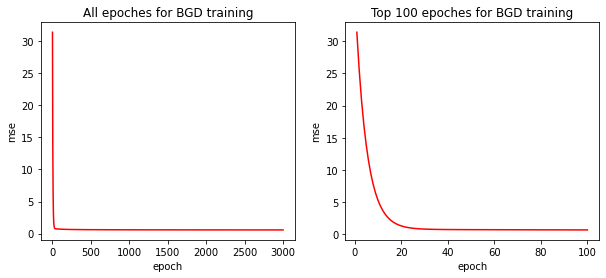

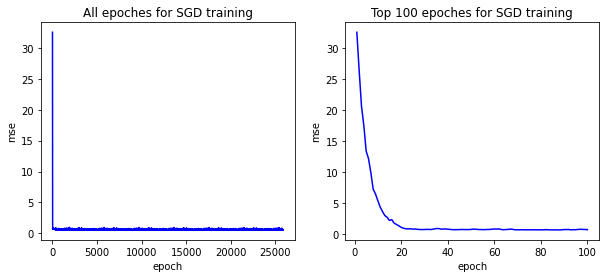

In [19]:
mses_BGD_4=show_BGD(0.1)
mses_SGD_4=show_SGD(0.1)

==================批量梯度下降=================
学习率 : 0.2
test_data mse : 0.5684722059461348
train_data mse : 0.571624296021711
==================随机梯度下降=================
学习率 : 0.2
test_data mse : 0.5779808163413682
train_data mse : 0.5747307380849439


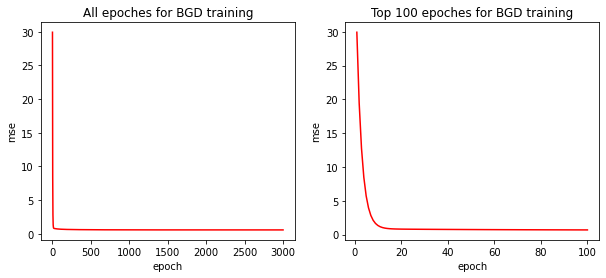

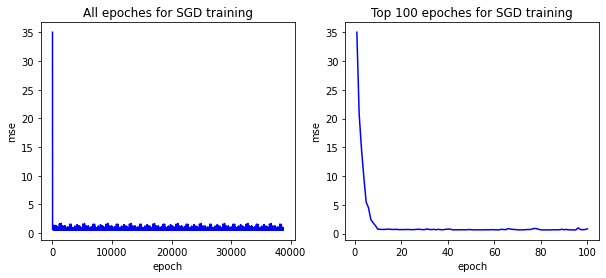

In [20]:
mses_BGD_5=show_BGD(0.2)
mses_SGD_5=show_SGD(0.2)

==================批量梯度下降=================
学习率 : 0.5
test_data mse : 0.5657040781566648
train_data mse : 0.5704275077772167
==================随机梯度下降=================
学习率 : 0.5
test_data mse : 0.8093026967317641
train_data mse : 0.7843119385472418


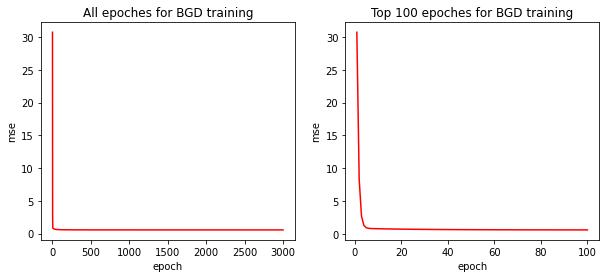

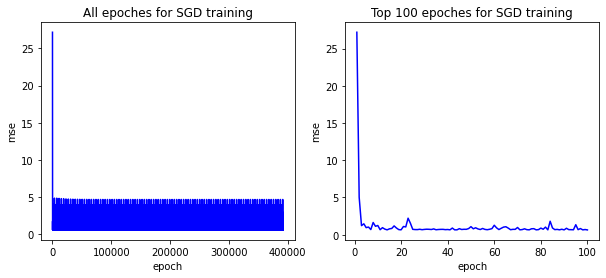

In [21]:
mses_BGD_6=show_BGD(0.5)
mses_SGD_6=show_SGD(0.5)

==================批量梯度下降=================
学习率 : 0.8
test_data mse : 0.5874953759091526
train_data mse : 0.5636275859093846
==================随机梯度下降=================
学习率 : 0.8
test_data mse : 2.5785444214759625
train_data mse : 2.568184745739122


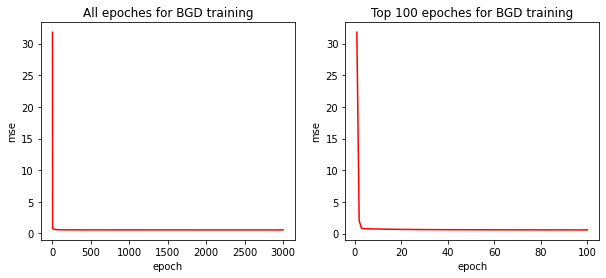

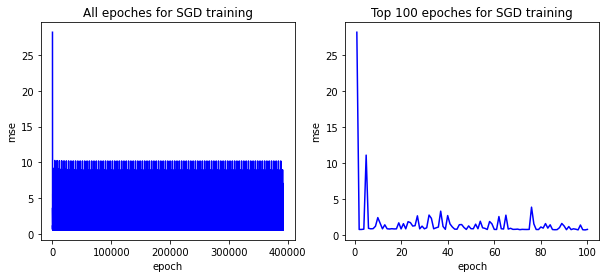

In [22]:
mses_BGD_7=show_BGD(0.8)
mses_SGD_7=show_SGD(0.8)

#### 结果分析

从上面的结果可知：

* 学习率越高，mse下降速度越快；学习率越低，mse下降速度越缓
* 随机梯度下降在训练时每轮迭代的mse处于跳动状态
* 批量梯度下降在每次迭代时，mse越来越小
* 学习率很低时，在测试集上的结果不如稍高的情况表现更好
* 当学习率很高时，由于随机梯度下降每次使用的样本不确定，其mse跳动状态越明显，越难收敛。就会导致上面几个图片的大幅度跳动情况。

并且根据最终结果，我们选择 0.1 左右的学习率较佳。

### 中级要求
探究回归模型在机器学习和统计学上的差异。

* 回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。





#### 线性回归模型：

* 线性回归在机器学习的角度：训练一个基于平方误差最小的线性回归器，并输出与统计线性回归模型相同的结果。
  * 一方面，机器学习是对模型进行“训练”，需要一个数据子集。
  * 另一方面，直到用非训练数据对模型测试前，我们并不知道这个模型的性能。
  * 因此，机器学习的目的在于获得基于测试数据集的模型最佳性能。

* 线性回归在统计模型的角度：是一种统计学模型
  * 统计模型的重点在于刻画数据与结果变量之间的关系，而不是对未来的数据进行预测。
  * 对模型的评估不涉及测试数据集，而是对模型参数进行重要性和鲁棒性评估。


也就是说，有监督的机器学习主要是构建一个可重复预测的模型，是以结果为导向的。实际上我们只关心这个模型能不能用，而不是去解释它的机制。而统计模型则更关注于发现变量间的关系以及这一关系的重要性。


#### 具体区别：

* 目标差异：统计学中的回归更关注变量间的关系和这些关系的重要性；机器学习更关注模型的可用性。

* 可解释性的差异：统计学模型可以用数学解释清楚，机器学习模型是黑盒模型，可解释性差。

* 数据集差异：统计学求解使用所有数据，计算过程较复杂；而机器学习划分了测试集和训练集，还会使用随机梯度下降方法，没有使用全部数据，计算过程较简单。

* 实现差异：统计模型不用训练和测试，更关注刻画数据和结果的关系；机器学习需要获得可重复预测的模型，需要训练和测试。

* 评估方法差异：统计学中的回归模型重点是对模型参数进行重要性和鲁棒性评估，使用置信区间、显著性检验等其他检验评估；机器学习中的回归模型重点是对测试集的评估，使用评价指标，如accuracy,precision等。


### 高级要求
编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法**均可**）。

In [23]:
def Ridge_regression(path,lamda):
    train_data, train_label, test_data, test_label = data_process(path)
    
    X = np.mat(train_data)
    Y = np.mat(train_label.reshape(-1,1))
    xTx = X.T * X
    xTx_r = xTx + np.eye(X.shape[1]) * lamda 

    weight = xTx_r.I * X.T * Y
    weight=np.array(weight)
    weight=weight.flatten()
    
    train_mse = MSE(weight, train_data, train_label)
    test_mse = MSE(weight, test_data, test_label)

    return weight, train_mse,test_mse

In [24]:
path = "winequality-white.csv"
weight,train_mse,test_mse=Ridge_regression(path,0.5)

print('==================基于解析法的岭回归================')
print('train_data mse :', train_mse)
print('test_data mse :', test_mse)

==================基于解析法的岭回归================
train_data mse : 0.5575800433535653
test_data mse : 0.6014699798582943
